In [13]:
import argparse
import re
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# global settings
fontsize=20

In [22]:
!cp ../swarm-* .

In [27]:
!hdr-plot --save swarm-*

In [28]:
df = pd.read_csv('df-exp0.csv')
df.head()
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')

In [31]:
df.shape

(3, 18)

In [16]:
df.describe()

,Latency,Requests,Throughput,Baseline,Infinite,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
count,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.000000
mean,9.986667,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,3.591333,22.178667,1.962667,199.733333
std,2.440744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.902621,10.251932,0.807447,0.015275
min,7.970000,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,2.550000,10.344000,1.433000,199.720000
25%,8.630000,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,3.312000,19.100000,1.498000,199.725000
50%,9.290000,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,4.074000,27.856000,1.563000,199.730000
75%,10.995000,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,4.112000,28.096000,2.227500,199.740000
max,12.700000,200.0,5993.0,0.0,0.0,0.0,1.0,1.0,4.0,8.0,30.0,4.150000,28.336000,2.892000,199.750000


In [3]:
def plot_thr_req(tail_data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))

    # create new relevant labels
    data = pd.concat(tail_data)
    data['filename'] = labels
    data = data.sort_values(by='Requests').reset_index(drop=True)

    # labels = data['Orchestrator'].unique() 
    labels = ["swarm","k8s", "nomad"]
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    orchestrator = data['Orchestrator'].unique()[0]
    benchmark = data['Benchmark'].unique()[0]

    for mark, orch in enumerate(labels):
        plot_data = data.loc[data['Orchestrator'] == orch]
        ax.plot(plot_data['Requests'], plot_data['Throughput'], label=f"{benchmark}-{orch}-baseline", linestyle=lines[mark % len(markers)])

    # set axis and legend
    ax.grid()
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Throughput', fontsize=fontsize)
    ax.set_title('Throughput versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax

In [17]:
print(df['Requests'], df['Latency'])

0    200.0
1    200.0
2    200.0
Name: Requests, dtype: float64 0    12.70
1     9.29
2     7.97
Name: Latency, dtype: float64


<AxesSubplot:xlabel='Requests', ylabel='Latency'>

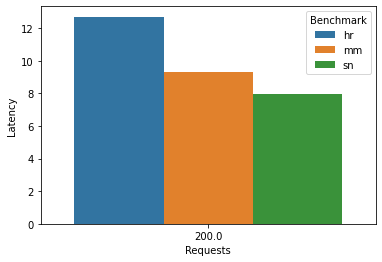

In [20]:
sns.barplot(x='Requests', y='Latency', hue='Benchmark', data=df)

<AxesSubplot:xlabel='Requests', ylabel='Latency'>

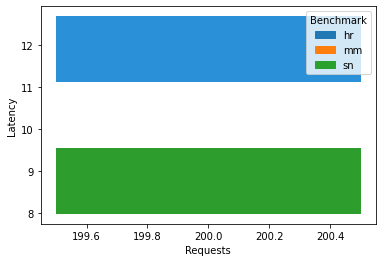

In [21]:
sns.histplot(x='Requests', y='Latency', hue='Benchmark', data=df)